In [1]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import pandas as pd

import os
%matplotlib inline
import matplotlib.pyplot as plt
mda.__version__

'2.6.1'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set_theme(style='ticks')
sbn.set_context("poster")

In [3]:
import pandas as pd

22.70614540914539
12.592200291594864


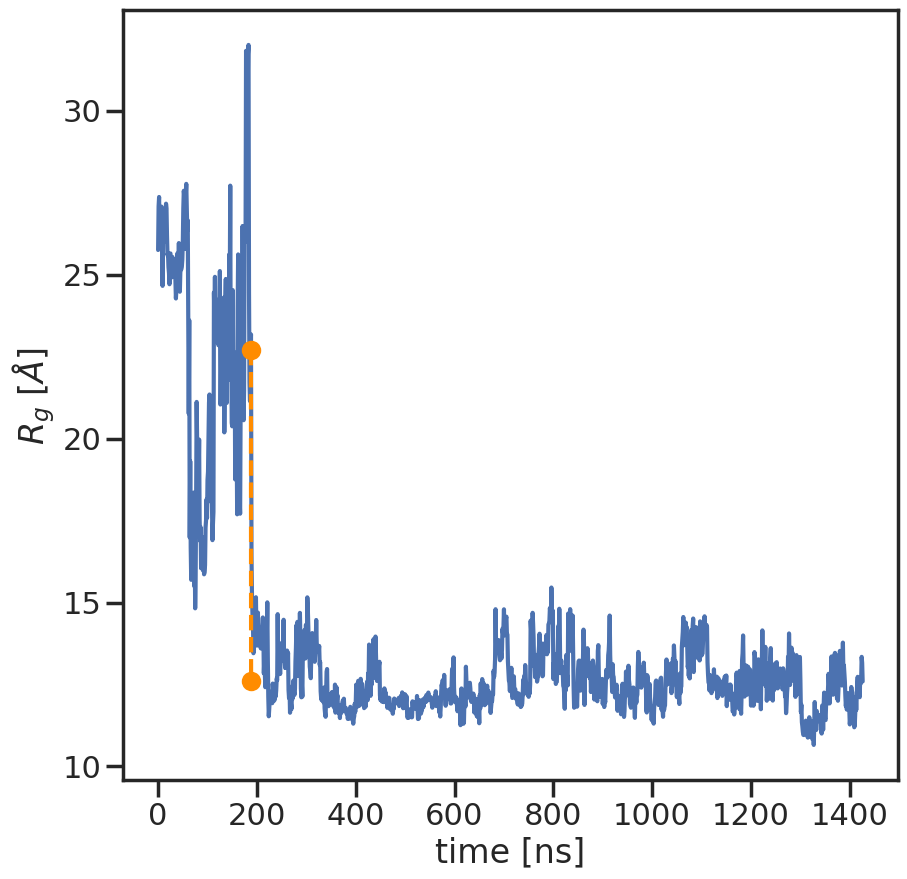

In [4]:
## Plotting Rg
alpha_syn = pd.read_csv('alpha-syn_Rg_data.csv', index_col=0)
f = plt.figure(figsize=(10, 10))

sbn.lineplot(
    data=alpha_syn,
    x= 'Time (ns)', y= 'Rg')

# Calculate and print average values before and after x=188
average_before = alpha_syn[alpha_syn['Time (ns)'] < 188]['Rg'].mean()
print(average_before)
average_after = alpha_syn[alpha_syn['Time (ns)'] >= 188]['Rg'].mean()
print(average_after)

# Plotting dots at average values
plt.scatter([188], [average_before], color='darkorange', zorder=5)
plt.scatter([188], [average_after], color='darkorange', zorder=5)

# Plotting the dotted line between the two dots
plt.plot([187.8, 188.2], [average_before, average_after], color='darkorange', linestyle='--', zorder=5)

# update axis labels here
plt.xlabel('time [ns]')
plt.ylabel(r'$R_g$ [$\AA$] ')
f.savefig('Rg_asyn.jpg', dpi=300)

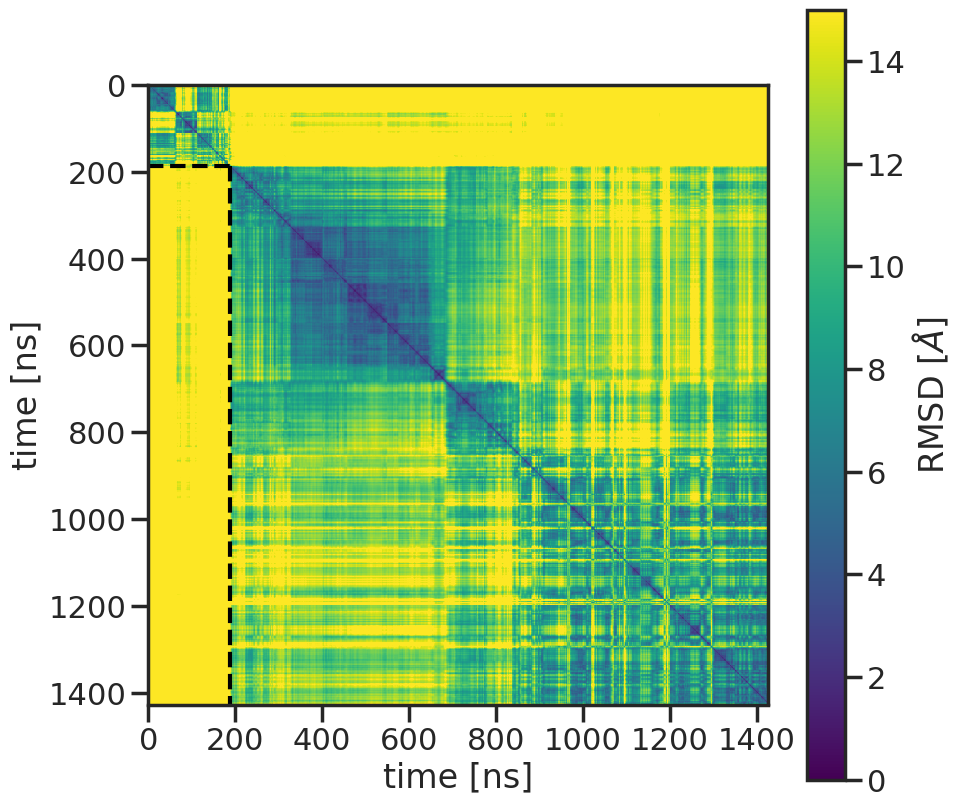

In [5]:
## Plotting pairwise RMSD
alpha_syn_pairRMSD = pd.read_csv('alpha-syn_pairRMSD_data.csv', index_col=0)
f = plt.figure(figsize=(10, 10))

plt.imshow(alpha_syn_pairRMSD, cmap='viridis', vmin=0, vmax=15)

# Determine the last value in the plot
last_value = alpha_syn_pairRMSD.index[-1]

# Calculate the number of ticks needed at intervals of 200
num_ticks = int(np.ceil(last_value / 200)) + 1

# Set the ticks of x and y axes at equally spaced intervals from 0 to the last value at intervals of 200
tick_positions = np.arange(0, last_value + 1, 200)
plt.xticks(ticks=tick_positions)
plt.yticks(ticks=tick_positions)

# Define the coordinates for the intersection point at the diagonal of the plot, 188 comes from VMD visualisation of protein becoming compact
x_intersection = 188
y_intersection = 188

# Plotting the vertical dotted line at x=188
plt.plot([x_intersection, x_intersection], [y_intersection, last_value], color='black', linestyle='--')

# Plotting the horizontal line at y=188
plt.plot([0, x_intersection], [y_intersection, y_intersection], color='black', linestyle='--')


plt.xlabel('time [ns]')
plt.ylabel('time [ns]')
plt.colorbar(label=r'RMSD [$\AA$]')
f.savefig('pairRMSD_asyn_global.jpg', dpi=300, bbox_inches='tight')